# Исследование поведения пользователей приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Данные о пользователях, привлечённых **с 1 мая по 27 октября 2019 года**: 
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель исследования:** изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Ход исследования:**
Данные представлены в таблицах: `visits_info_short.csv, orders_info_short.csv, costs_info_short.csv`. О качестве данных ничего не известно, поэтому потребуется предобработка данных.

Исследование пройдет в 5 этапов:

- обзор данных;
- предобработка данных;
- анализ данных;
- маркетинг;
- оценка окупаемости рекламы для привлечения пользователей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-на-аномалии-и-исправление" data-toc-modified-id="Проверка-данных-на-аномалии-и-исправление-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка данных на аномалии и исправление</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оценка-окупаемости-рекламы-для-привлечения-пользователей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка окупаемости рекламы для привлечения пользователей</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try: 
    visits, orders, costs = (
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 6/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 6/orders_info_short.csv'),  # покупки
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 6/costs_info_short.csv'),  # траты на рекламу
)
    
except FileNotFoundError:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [3]:
# cоздаем функцию для обзора данных 
def info_table(table):
    display(table.head(5))
    print(table.info())
    display(table.describe(include = 'all').T)

In [4]:
info_table(visits) # обзор данных журнала сессий

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User Id,309901.0,NaN,NaN,NaN,499766449382.690674,288789916887.827209,599326.0,249369122776.0,498990589687.0,749521111616.0,999999563947.0
Region,309901,4,United States,207327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device,309901,4,iPhone,112603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,309901,11,organic,107760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session Start,309901,306813,2019-06-27 14:56:41,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session End,309901,306793,2019-07-16 02:23:30,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице **visits** (лог сервера с информацией о посещениях сайта) 6 столбцов и 309901 строк, тип данных представленный в таблице object и int64.

Согласно документации к таблице:
- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

Во всех столбцах количество занчений совпадает, значит пропущенные значения отсутствуют. Названия столбцов и данные в ячейках необходимо привести к нижнему регистру, а также заменить названия некоторых столбцов на 'змеиный' регистр.
Тип данных в столбцах `Session Start` и `Session End` необходимо привести к типу date.

In [5]:
info_table(orders) # обзор данных покупок

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User Id,40212.0,NaN,NaN,NaN,499029531203.234436,286093675967.164368,599326.0,251132440436.75,498283972665.0,743332711780.0,999895427370.0
Event Dt,40212,40163,2019-10-26 06:49:22,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,40212.0,NaN,NaN,NaN,5.370608,3.454208,4.99,4.99,4.99,4.99,49.99


В таблице **orders** (информация о заказах) 3 столбца и 40212 строк, тип данных представленный в таблице float64, int64, object.

Согласно документации к таблице:

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

Во всех столбцах количество занчений совпадает, значит пропущенные значения отсутствуют. Названия столбцов и данные в ячейках необходимо привести к нижнему регистру, а также заменить названия некоторых столбцов на 'змеиный' регистр.
Столбец `Event Dt` необходимо привести к типу date.

In [6]:
info_table(costs) # обзор данных трат на рекламу

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dt,1800,180,2019-05-01,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,1800,10,FaceBoom,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costs,1800.0,NaN,NaN,NaN,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0


В таблице **costs** (информация о затратах на маркетинг) 3 столбца, 1800 строк, тип данных, представленный в таблице float64, object.

Согласно документации к таблице:

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

Во всех столбцах количество занчений совпадает, значит пропущенные значения отсутствуют. Названия столбцов и данные в ячейках необходимо привести к нижнему регистру, а также заменить названия некоторых столбцов на 'змеиный' регистр. Столбец `dt` необходимо привести к типу date.

**Выводы:** 
Данные представлены в 3 таблицах:
- Таблица **visits** (лог сервера с информацией о посещениях сайта) - журнал сессий, содержит данные уникальный идентификатор пользователя, регион, название устройства, каннал привлечения, дату и время начала и окончания сессии. 
- Таблица **orders** (информация о заказах) - покупки, содержит данные о пользователях, дату и время совершенной покупки, а также полученную выручку.
- Таблица **costs** (информация о затратах на маркетинг) - затраты на рекламу, содержит информацию о рекламном источнике, дате и затратах на этот источник.

Обнаружены:
- некорректные написания заголовков столбцов (необходимо привести к нижнему и 'змеиному' регистру),
- некорректное написание данных в ячейках (необходимо привести к нижнему регистру),
- все даты в таблицах необходимо привести к типу date.


## Предобработка данных

Сначала приведем все названия столбцов таблицы, а также категориальные столбцы к нижнему регистру.

In [7]:
# приводим названия столбцов к нижнему регистру, заменяем пробелы в названиях столбцов
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

# приводим содержание столбцов к нижнему регистру
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

# проверяем произведенные изменения
display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


### Проверка данных на аномалии и исправление

Рассмотрим содержание значений, категориальных столбцов.

In [8]:
visits['region'].value_counts()

united states    207327
uk                36419
france            35396
germany           30759
Name: region, dtype: int64

In [9]:
visits['device'].value_counts()

iphone     112603
android     72590
pc          62686
mac         62022
Name: device, dtype: int64

In [10]:
visits['channel'].value_counts()

organic               107760
tiptop                 54794
faceboom               49022
wahoonetbanner         20465
leapbob                17013
opplecreativemedia     16794
rocketsuperads         12724
yrabbit                 9053
mediatornado            8878
adnonsense              6891
lambdamediaads          6507
Name: channel, dtype: int64

In [11]:
costs['channel'].value_counts()

faceboom              180
mediatornado          180
rocketsuperads        180
tiptop                180
yrabbit               180
adnonsense            180
leapbob               180
opplecreativemedia    180
wahoonetbanner        180
lambdamediaads        180
Name: channel, dtype: int64

Аномалий в данных не обнаружено.

### Изменение типов данных

In [12]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

# проверяем произведенные изменения
display(visits.dtypes, 
      orders.dtypes, 
      costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object

### Удаление дубликатов

Подсчитаем количество явных дубликатов данных.

In [13]:
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

**Выводы:**
Привели названия столбцов в таблицах visits, orders, costs к нижнему регистру и переименовали столбцы в соответствии с хорошим стилем, привели содержание столбцов к нижнему регистру. Проверили данные на аномалии, аномалий не обнаружено. Привели столбцы с датой к типу date. Проверили наличие дубликатов данных, дубликатов не обнаружено.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

Добавим функции для расчета и графического изображения метрик.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Анализ данных

Построим профили пользователей, для этого используем функцию get_profiles() в качестве аргуметов передаем таблицы visits, orders, costs.
Определим минимальную и максимальную дату привлечения пользователей.

Ответим на вопросы:
- Из каких стран приходят посетители? 
- Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? 
- С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? 
- Какие каналы приносят больше всего платящих пользователей?

In [24]:
# строим профили пользователей с помощью функции get_profiles
profiles = get_profiles(visits, orders, costs)
profiles 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,mediatornado,pc,united states,2019-09-28,2019-09-01,False,0.205714


Определяем минимальную и максимальную дату привлечения пользователей.  Максимальный день привлечения клиентов рассчитаем по формуле: момент анализа данных - горизонт анализа данных. Из описания данных нам известно, что момент анализа данных  1 ноября 2019 года, а горизонт анализа составляет 2 недели.

In [25]:
min_date = min(profiles['first_ts'])
max_date = max(profiles['first_ts'])

observation_date = datetime(2019, 11, 1).date() #момент анализа
horizon_days = 14 #горизонт анализа
last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1) #максимальный день с учетом момента и горизонта анализа

print('Исследуемые данные собраны за период с', min_date, 'по', max_date)
print('Максимальный день сучетом момента и горизонта анализа данных:', last_suitable_acquisition_date)

Исследуемые данные собраны за период с 2019-05-01 00:00:41 по 2019-10-27 23:59:04
Максимальный день сучетом момента и горизонта анализа данных: 2019-10-19


Максимальная дата исследуемых данных отличается от максимально возможной даты привлечения клиентов с учетом горизонта анализа. Это необходимо учесть при исследовании.

Для составления портрета пользователя напишем функцию, которая принимает на вход столбец, группирует по нему профили пользователей, рассчитывает долю платящих пользователей и выводит круговые диаграммы и таблицу.

In [26]:
def portrait(attribute):
    profiles_group = profiles.groupby(attribute).agg({'user_id' : 'nunique', 'payer' : 'sum'}).rename(columns={'user_id': 'total'}).sort_values(by='total', ascending=False).reset_index()
    fig, axs = plt.subplots(1, len(profiles_group), figsize=(23, 5))
    fig.suptitle('Доли платящих пользователей')

    for i in range (len(profiles_group)):
        vals = profiles_group['total'][i], profiles_group['payer'][i]
        axs[i].pie(vals, autopct='%.1f%%', radius=1.2, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'});
        axs[i].set_title(profiles_group[attribute][i])
    plt.show()

    display(profiles_group)

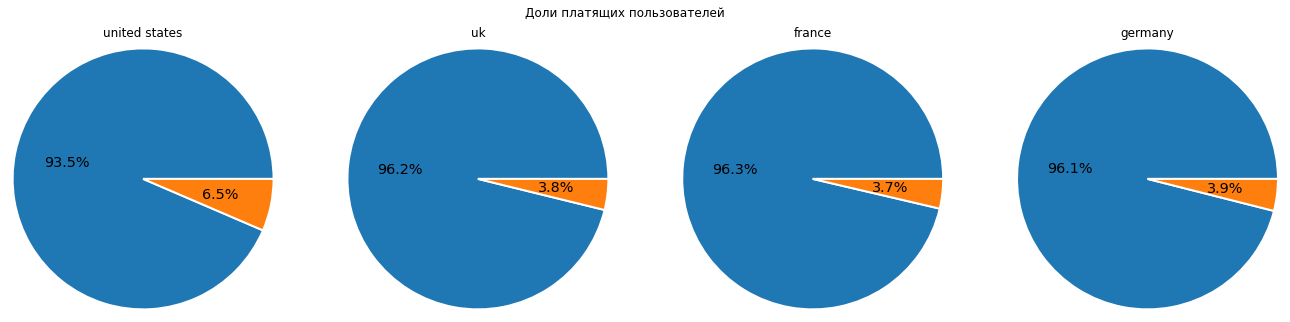

,region,total,payer
0,united states,100002,6902
1,uk,17575,700
2,france,17450,663
3,germany,14981,616


In [27]:
portrait('region')

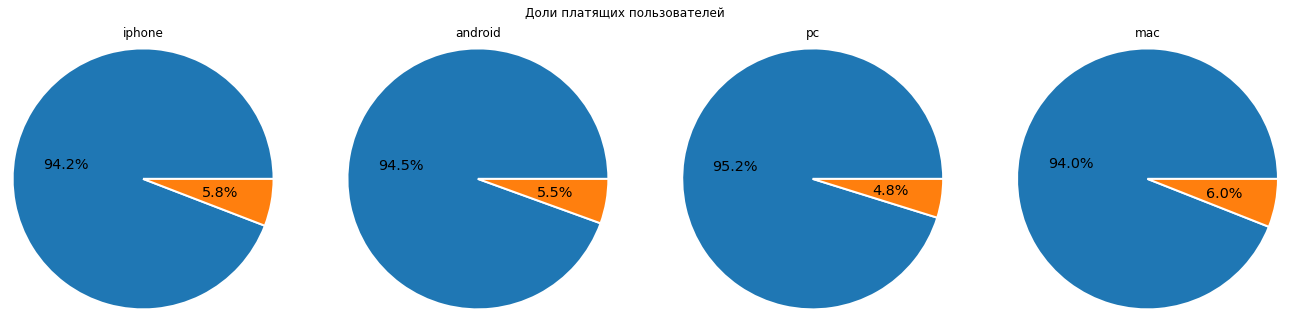

,device,total,payer
0,iphone,54479,3382
1,android,35032,2050
2,pc,30455,1537
3,mac,30042,1912


In [28]:
portrait('device')

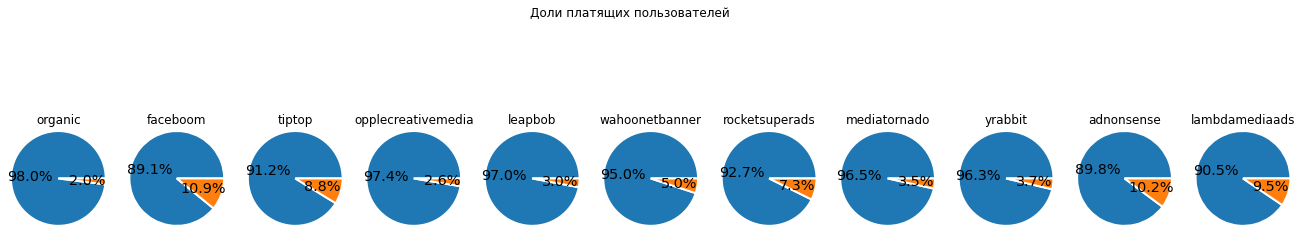

,channel,total,payer
0,organic,56439,1160
1,faceboom,29144,3557
2,tiptop,19561,1878
3,opplecreativemedia,8605,233
4,leapbob,8553,262
5,wahoonetbanner,8553,453
6,rocketsuperads,4448,352
7,mediatornado,4364,156
8,yrabbit,4312,165
9,adnonsense,3880,440


In [29]:
portrait('channel')

**Выводы:**
Минимальная дата привлечения новых пользователей - 1 мая 2019 года, максимальная дата привлечения новых пользователей с учетом того, чтобы они "прожили" 2 недели (с учетом момента анализа 1 ноября 2019 года)  - 19 октября 2019.

Пользователи приходят из 4 стран: **США, Великобритания, Франция и Германия**. Больше всего пользователей **100002** пришло из **США**. Также США лидируют по количеству платящих пользователей, их процент от общего количества составляет **6.5% (6902)**

Пользователи пользуются 4 типами устройств: **Android, Iphone, Mac и PC**.  Большинство пользователей пользуются **Iphone (54479)**.  Платящие пользователи чаще всего заходят с **Mac**, процент платящих пользователей составляет **6% (1912)**.

Привлечение пользователей шло по 11 каналам: adnonsense, faceboom, lambdamediaads, leapbob, mediatornado, opplecreativemedia, organic, rocketsuperads, tiptop, wahoonetbanner, yrabbit.
Больше всего пользователей относятся к категории organic (56439), т.е. не пользовались источниками привлечения, процент платящих пользователей самый низкий по сравнению с остальными источниками привлечения и составляет 2%.

К рекламным источникам с наибольшей долей привлеченных пользователей относятся: 
- **faceboom 29144** привлеченных пользователя - **10,9%** платящих пользователей, 
- **adnonsense 3880** привлеченных пользователя - **10,2%** платящих пользователей,
- **lambdamediaads 2149** привлеченных пользователя - **9.5%** платящих пользователей,
- **tiptop 19561** привлеченный пользователь – **8.8%** платящих пользователей.


## Маркетинг

Рассчитаем общую сумму расходов на маркетинг

In [30]:
round(costs['costs'].sum(), 2)

105497.3

Рассчитаем суммы затрат на привлечение клиентов по каждому источнику.

In [31]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False).reset_index()

,channel,costs
0,tiptop,54751.30
1,faceboom,32445.60
2,wahoonetbanner,5151.00
3,adnonsense,3911.25
4,opplecreativemedia,2151.25
5,rocketsuperads,1833.00
6,leapbob,1797.60
7,lambdamediaads,1557.60
8,mediatornado,954.48
9,yrabbit,944.22


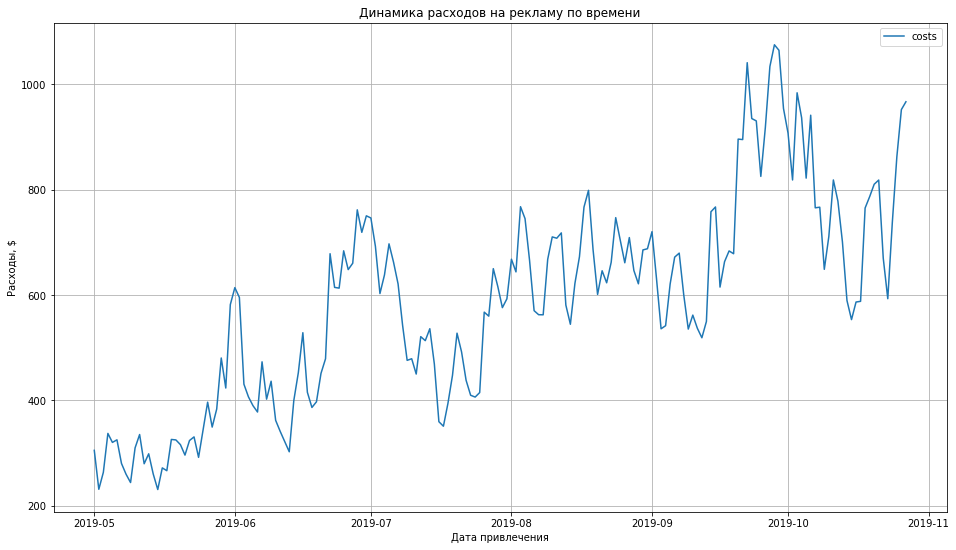

In [32]:
# строим график динамики общих расходов на рекламу по времени
costs.pivot_table(
    index='dt', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(16, 9))
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на рекламу по времени')
plt.show()

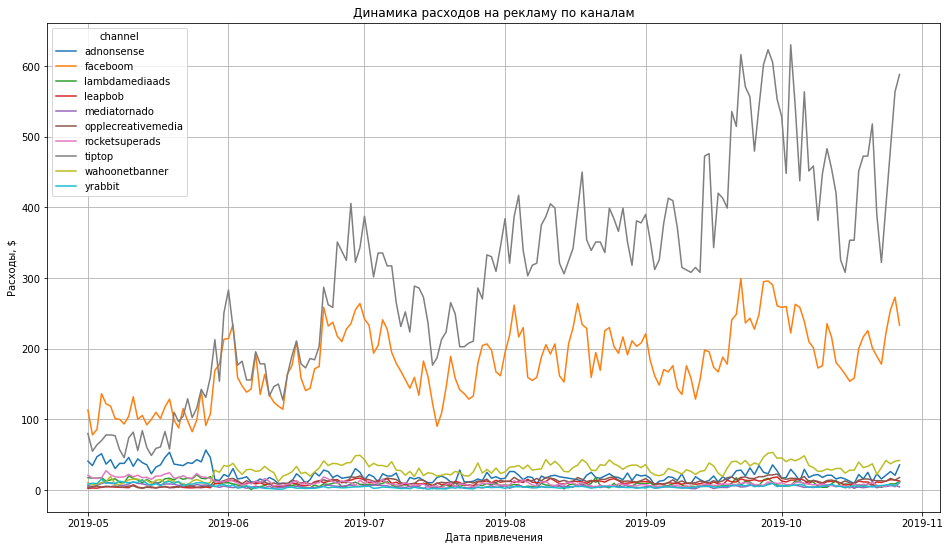

In [33]:
# строим график динамики расходов на рекламу по каждому каналу
costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(16, 9))
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на рекламу по каналам')
plt.show()

Рассчитаем сколько в среднем стоило привлечение одного покупателя из каждого источника, рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

Для рассчета стоимости привлечения 1 пользователя исключим из анализа данных пользователей, которые нашли приложение самостоятельно, без использования рекламы.

In [34]:
# фильтруем пользотельские профили по каналу "organic"

profiles = profiles.query('channel != "organic"')

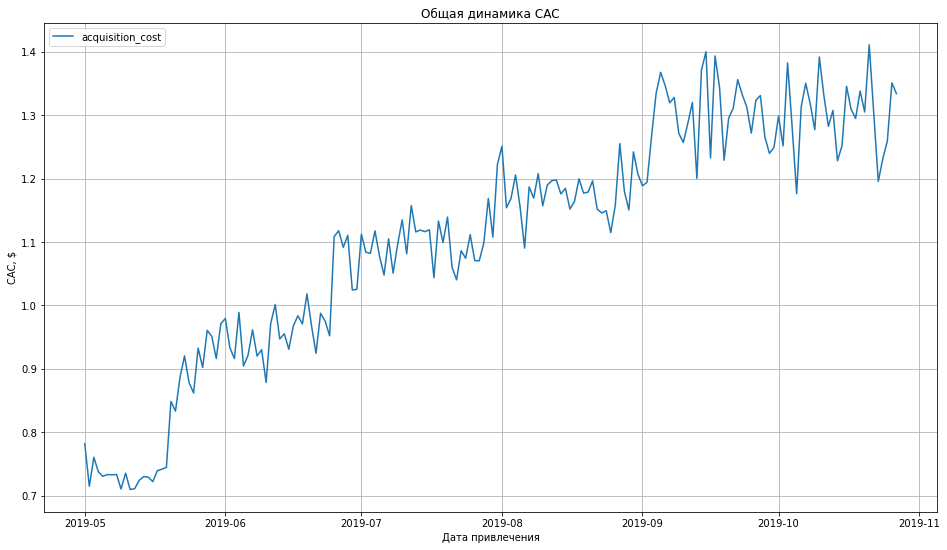

Сумма привлечения одного пользователя для всего проекта: 1.127481323942928


In [35]:
# строим график стоимости привлечения 1 пользователя для всего проекта

profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(16, 9))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Общая динамика CAC')
plt.show()

print('Сумма привлечения одного пользователя для всего проекта:', profiles['acquisition_cost'].mean())


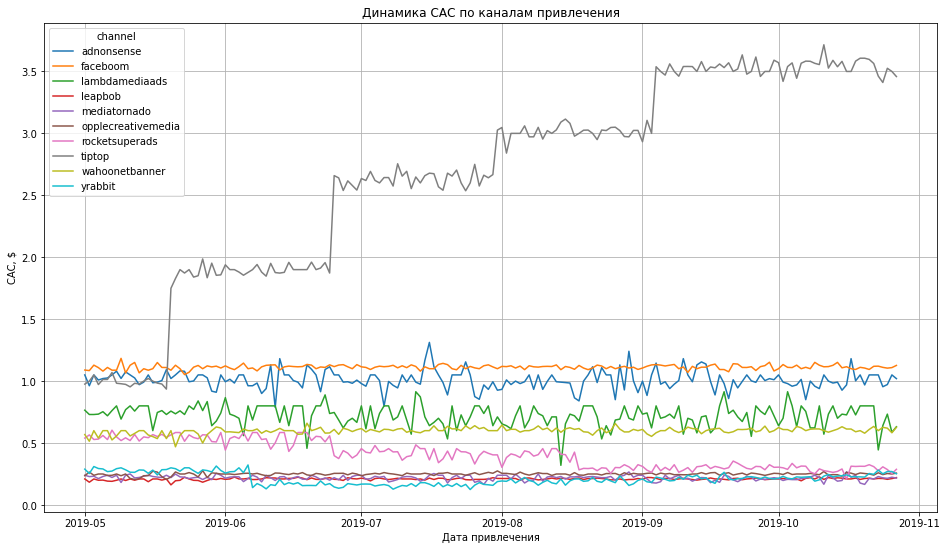

,channel,acquisition_cost
0,tiptop,2.799003
1,faceboom,1.113286
2,adnonsense,1.008054
3,lambdamediaads,0.724802
4,wahoonetbanner,0.602245
5,rocketsuperads,0.412095
6,opplecreativemedia,0.250000
7,yrabbit,0.218975
8,mediatornado,0.218717
9,leapbob,0.210172


In [36]:
# строим график динамики CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(16, 9))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

display(profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).sort_values(by='acquisition_cost', ascending=False).reset_index())


**Выводы:**
Общая сумма расходов на маркетинг составляет **105497.3**
Больше всего было потрачено на следующие каналы привлечения пользователей:
- **tiptop	54751.30**
- **faceboom	32445.60**
- **wahoonetbanner	5151.00**

Общие расходы на рекламу росли на протяжении всего изучаемого промежутка времени. 
Анализ динамики расходов по каналам показывает, что расходы на канале tiptop значительно выросли со временем, на канале faceboom расходы увеличились, но не так значительно. По остальным каналам общая тенденция сохранения расходов на рекламу на одном уровне.

Сумма привлечения одного пользователя увеличивалась во времени. Средняя стоимость привлечения одного клиента для всего проекта составляет: **1.13**.
Анализ динамики CAC по каналам привлечения показывает, что сильно рос CAC по каналу tiptop. По остальным каналам такого роста не наблюдалось. Стоимость привлечения одного пользователя по каналу **tiptop** составляет **- 2,799, faceboom -	1.113, adnonsense	- 1.008**. 

## Оценка окупаемости рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы.
Построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Ответим на вопросы:

- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- С чем могут быть вызваны проблемы окупаемости? 

Продолжим рассматривать данные без 'органических' пользователей, т.к. они пришли сами и их действия не связаны с затратами на рекламные компании. А их наличие в исследуемых данных повлияет на расчет метрик.

Рассмотрим общую окупаемость рекламы

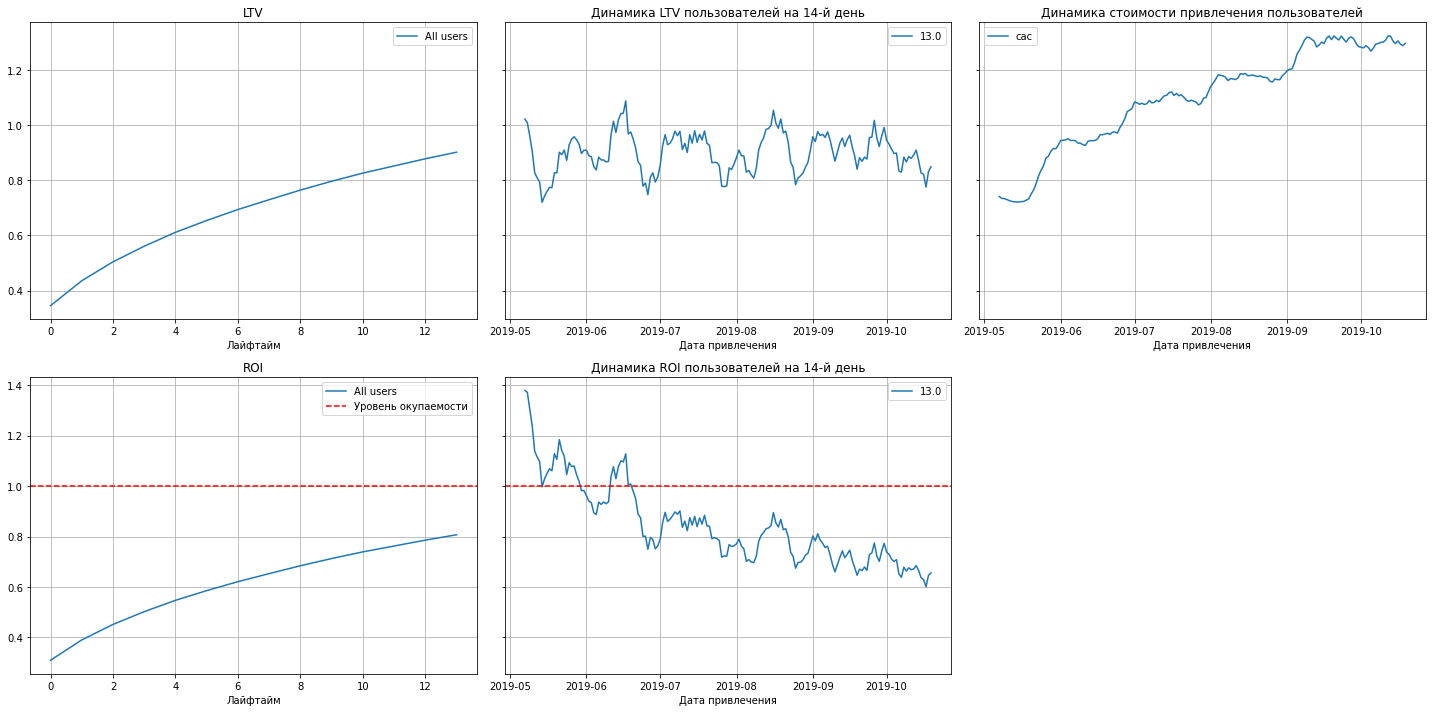

In [37]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

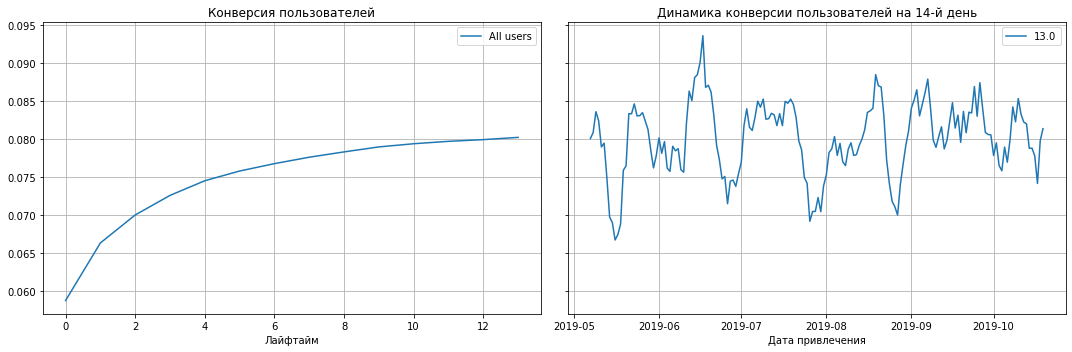

In [38]:
#считаем конверсию для всего проекта
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Реклама не окупается, ROI в конце октября на уровне 80%, стоимость привлечения пользователей растет.  LTV стабильно растет. Динамика ROI пользователей на 14 день существенно снижается.

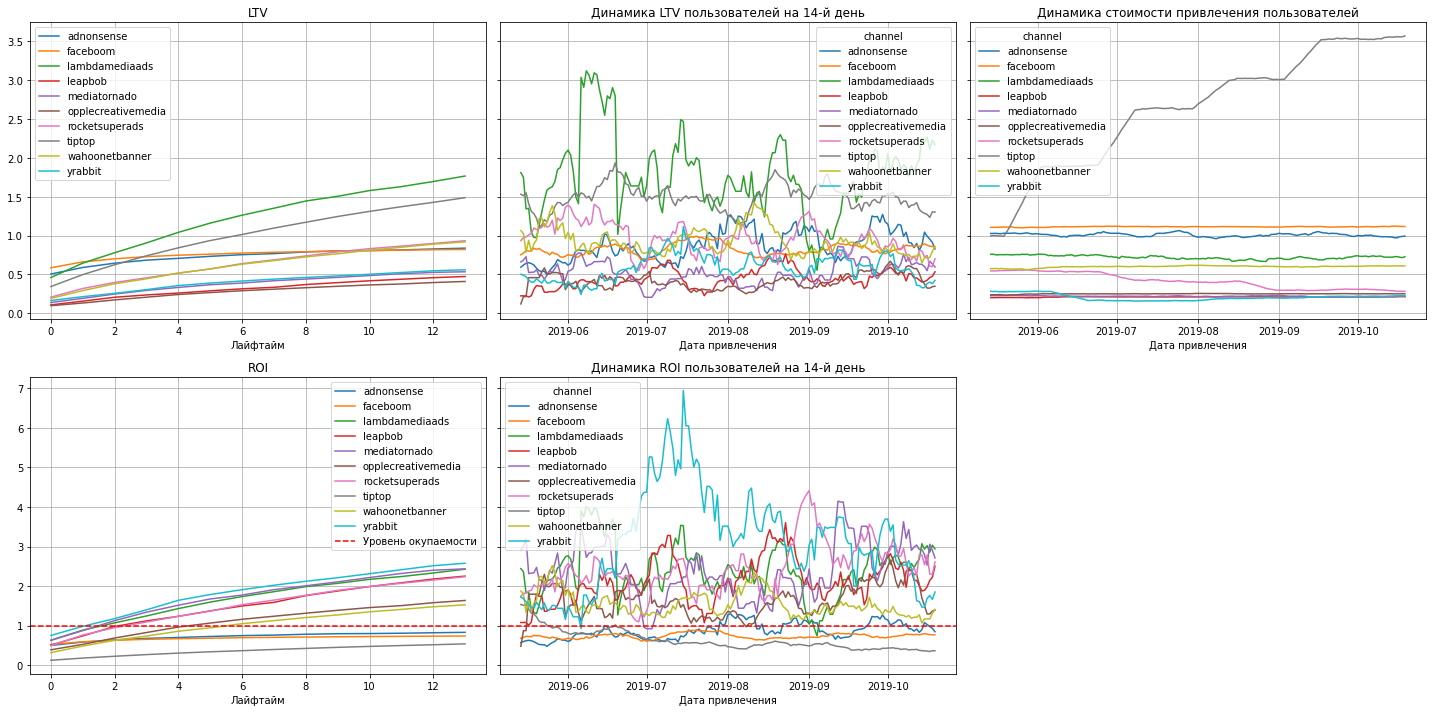

In [39]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV по всем каналам стабильно растет. Окупились большинство каналов за исключением tiptop, faceboom, adnonsense. Самая высокая окупаемость у канала yrabbit.  Стоимость привлечения пользователей практически по всем каналам стабильна, выделяется канал tiptop в котором стоимость привлечения пользователей растет от месяца к месяцу.

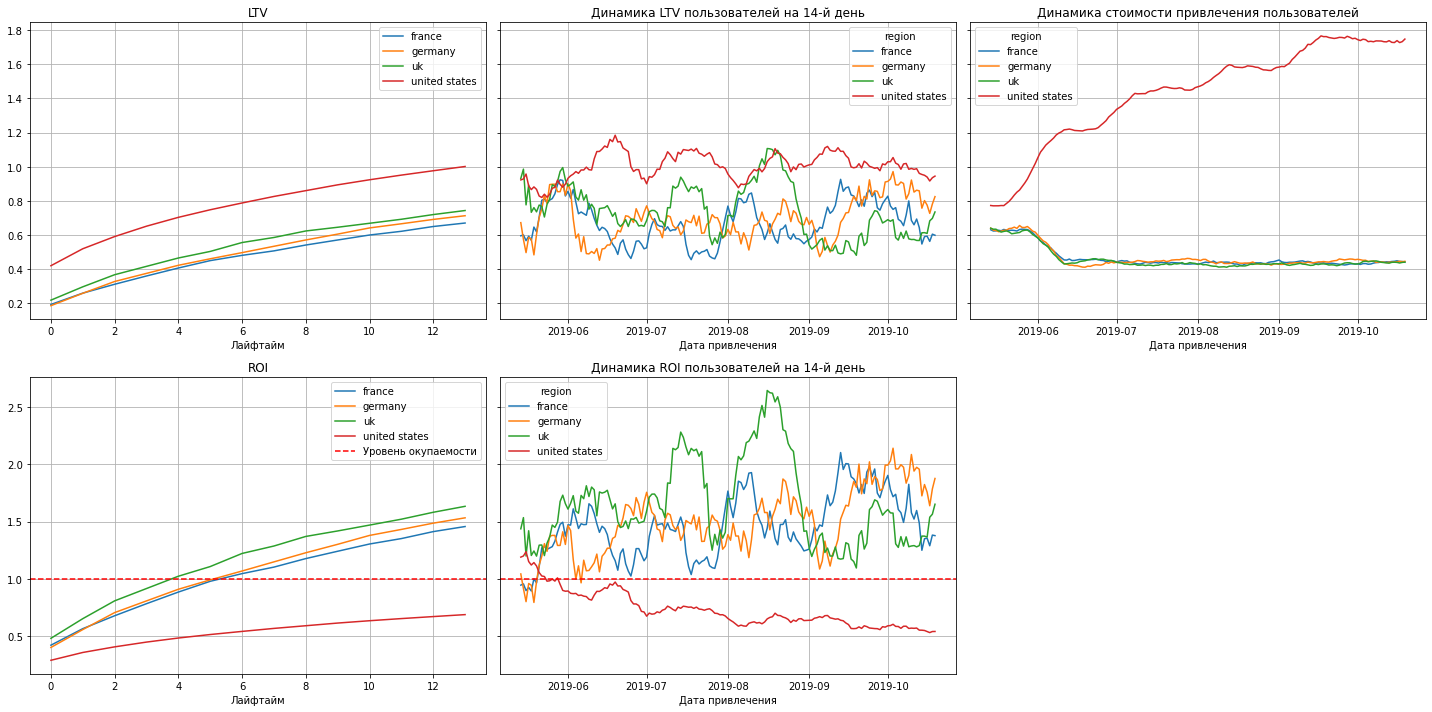

In [40]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама окупилась во всех странах кроме США, но LTV у клиентов из США самое высокое. Динамика ROI пользователей из США показывает отрицательную динамику и опускается ниже уровня окупаемости, в тоже время стоимость привлечения значительно выше, чем в остальных странах и постоянно растет.

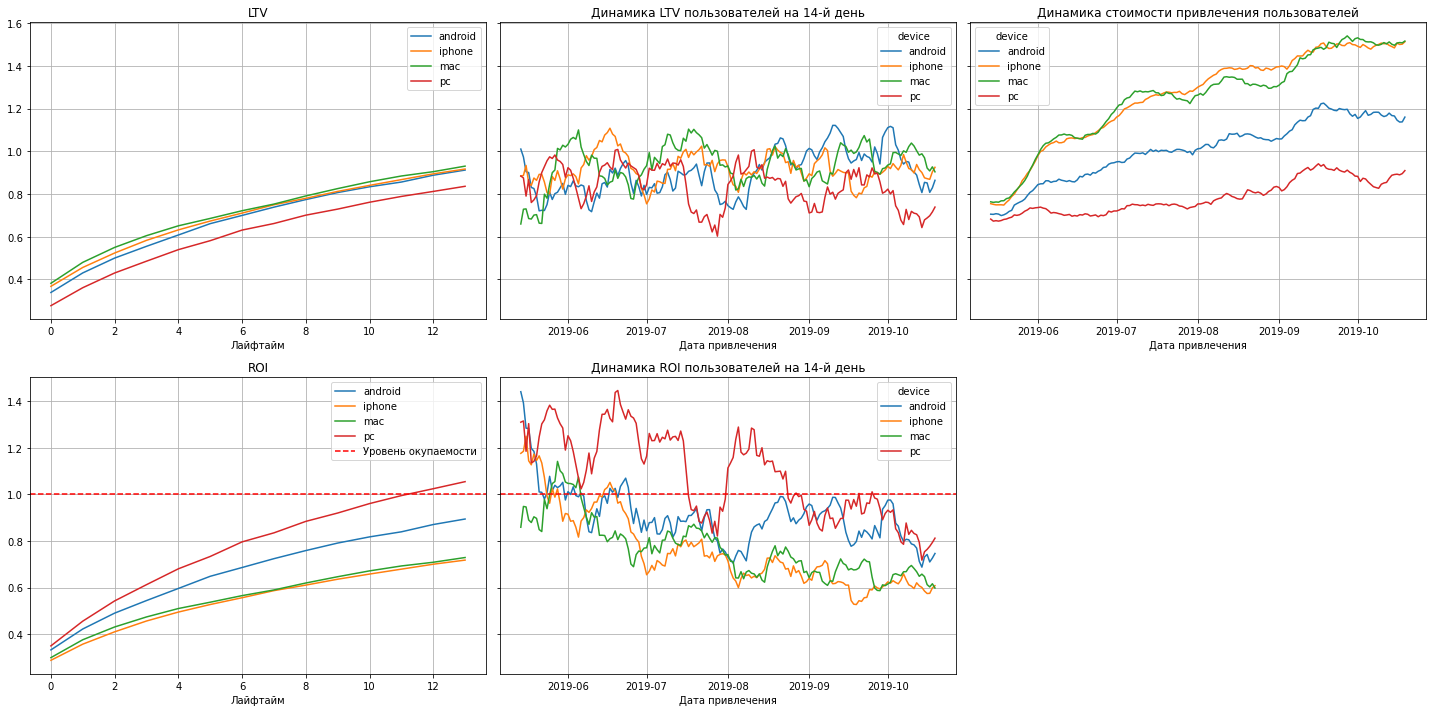

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения пользователей растет для всех устройств. Окупилась реклама только для пользователей pc, ROI для android в конце исследования на уровне 90%, для iphone и mac чуть выше 70%. Для пользователей PC ROI на 14 день имеет отрицательную тенденцию и снижается ниже уровня окупаемости. LTV стабильно растет.

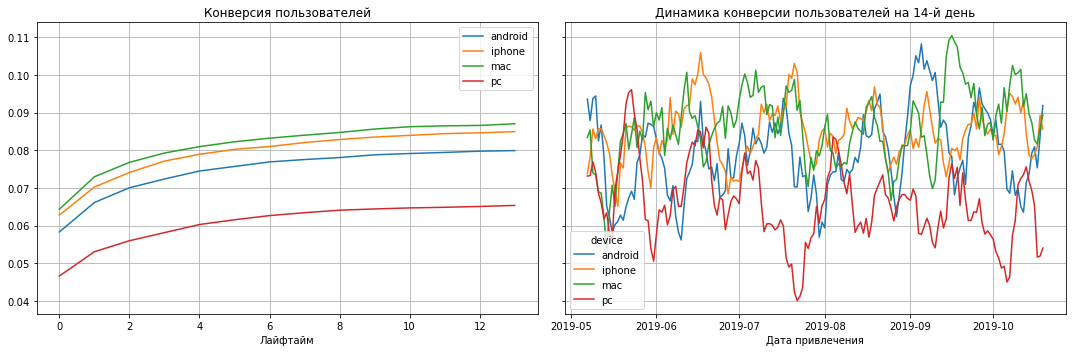

In [42]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей PC самая низкая, лучше всех конвертируются пользователи MAC.

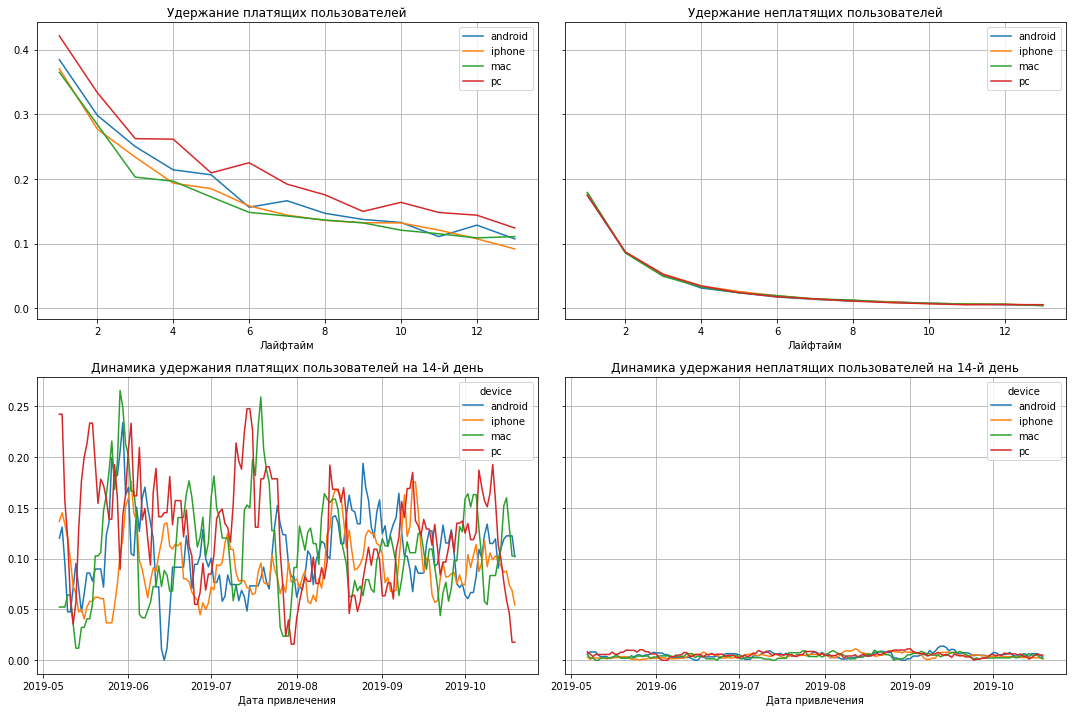

In [43]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Для всех устройств динамика удержания платящих и неплатящих пользователей примерно одинакова. Платящие пользователи PC удерживаются немного лучше остальных. Немного лучше остальных удеражние пользователей PC, а вот пользователи Iphone удерживаются немного хуже остальных.

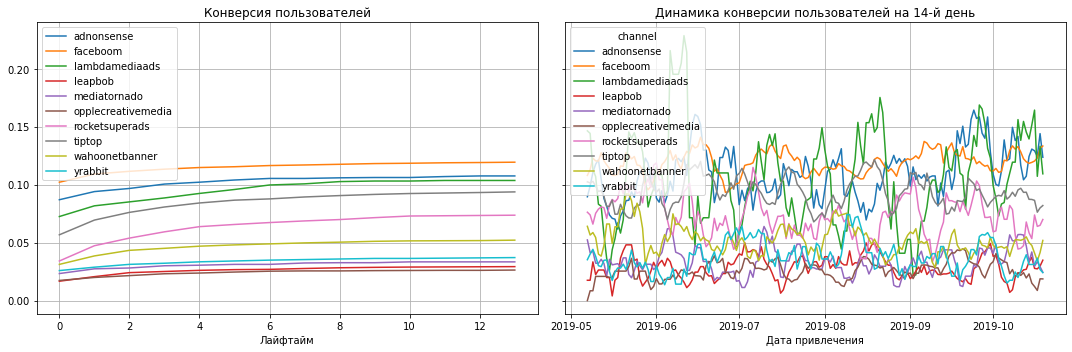

In [44]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая высокая конверсия у канала faceboom. 

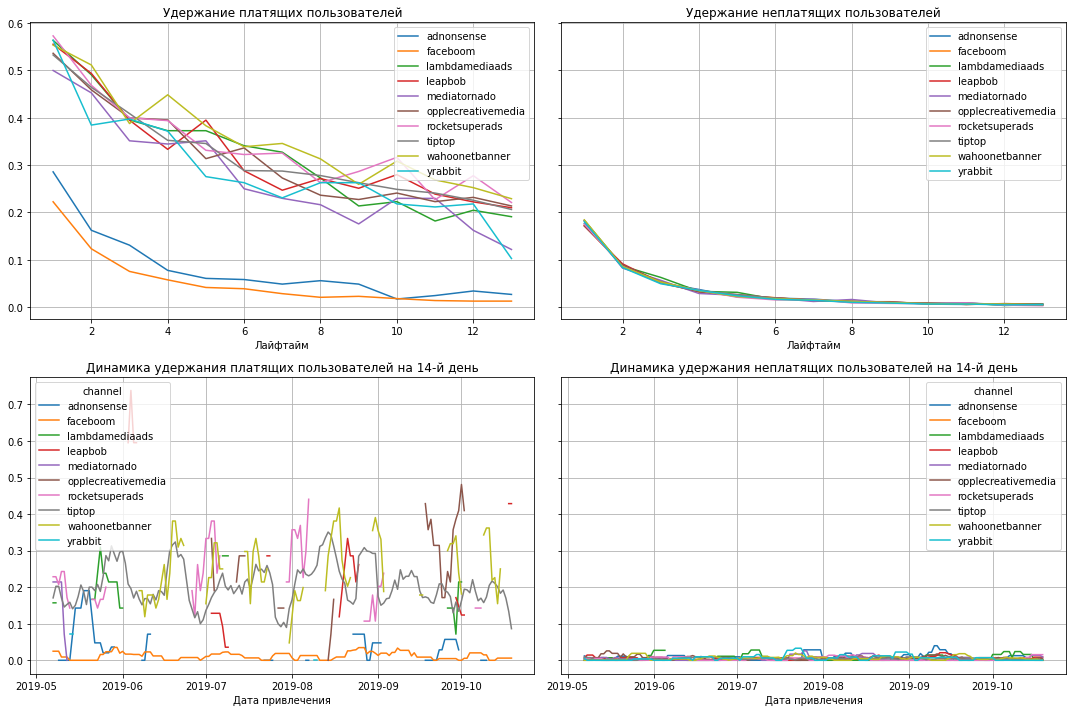

In [45]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самые низкие показатели удержания платящих пользователей у каналов adnonsense и faceboom.

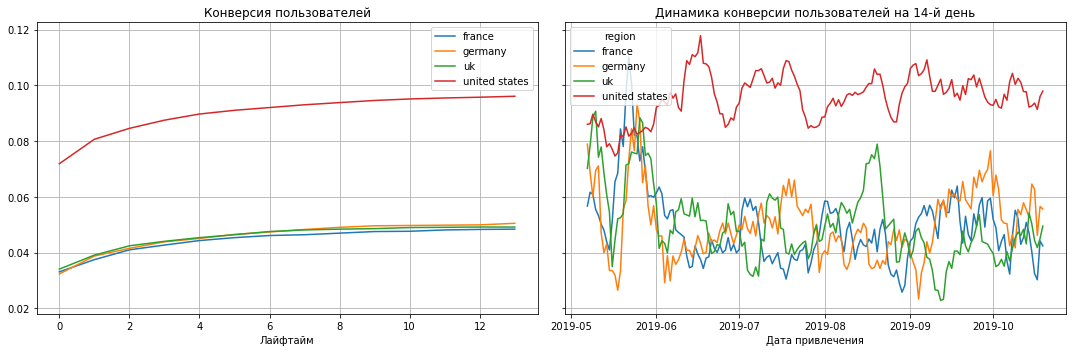

In [46]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самый высокий показатель конверсии у пользователей из США, в остальных регионах конверсия примерно на одном уровне.

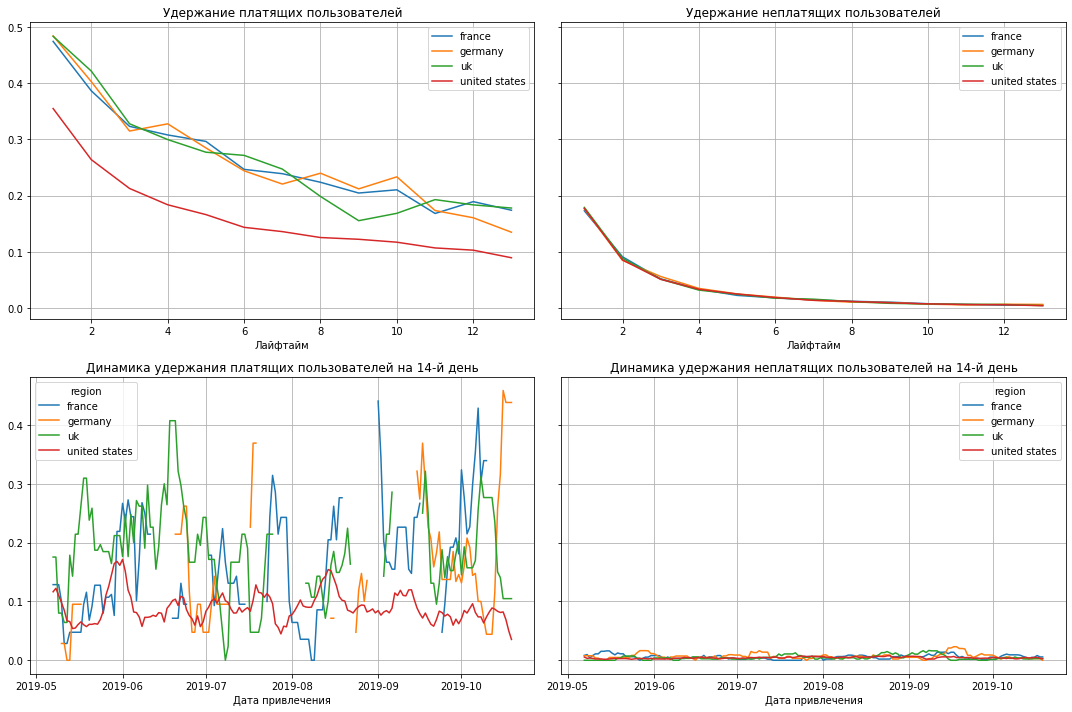

In [47]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей в США самое низкое среди остальных регионов.

Рассмотрим отдельно профили пользователей из США, чтобы конкретнее выявить причины возникших проблем и пути их решения.

In [48]:
# фультруем пользователей только из США

profiles = profiles.query('region == "united states"')

Рассмотрим какие каналы привлечения используются в США, рассчитаем метрики и визуализируем их.

In [49]:
profiles['channel'].value_counts()

faceboom          29144
tiptop            19561
rocketsuperads     4448
mediatornado       4364
yrabbit            4312
Name: channel, dtype: int64

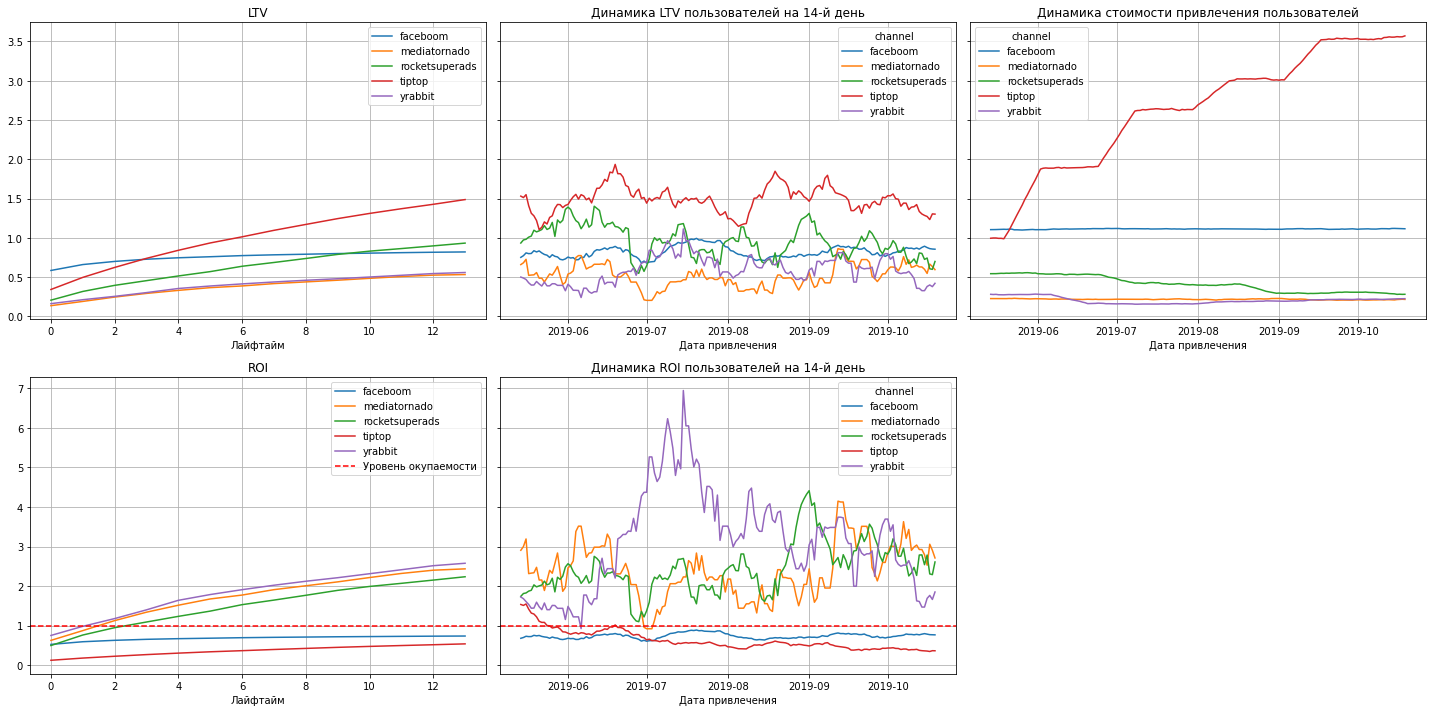

In [50]:
# смотрим окупаемость с разбивкой по каналам для пользователей из США

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

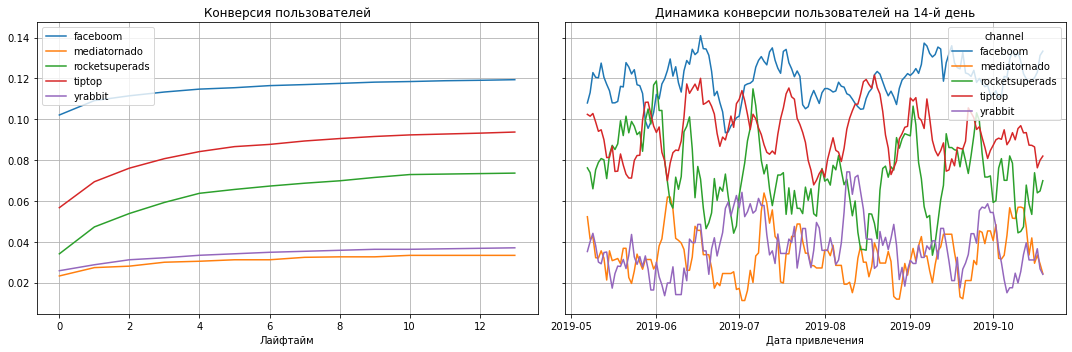

In [51]:
# смотрим конверсию с разбивкой по каналам для пользователей из США
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

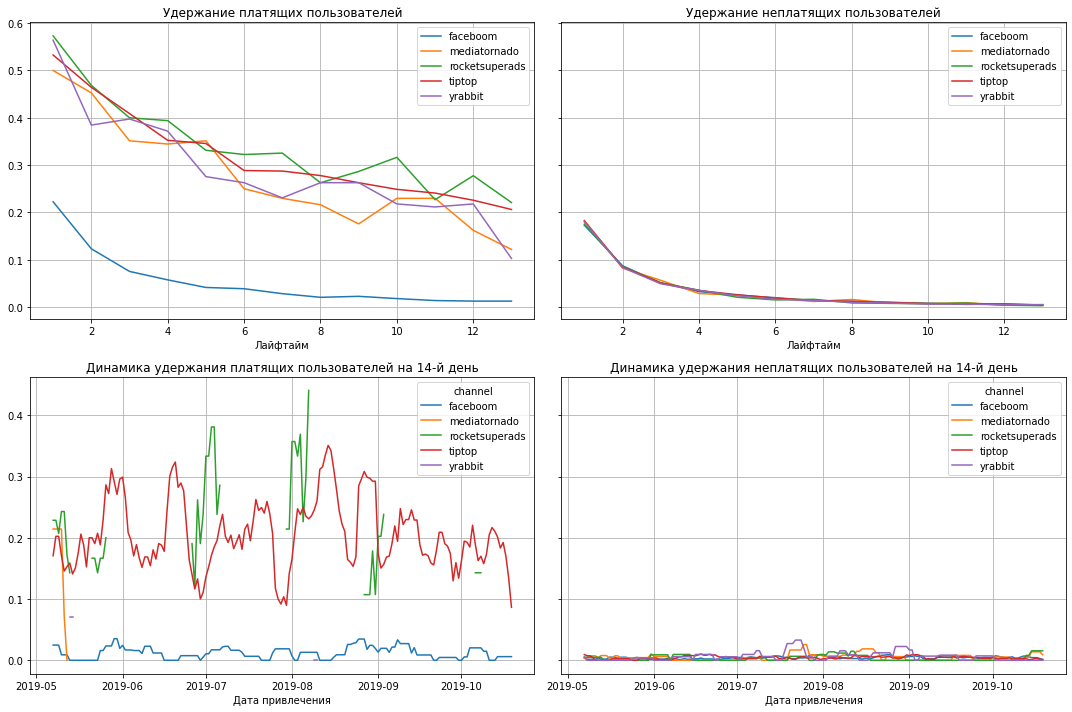

In [52]:
# смотрим удержание с разбивкой по каналам для пользователей из США
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США приходят из 5 каналов: **faceboom, tiptop, rocketsuperads , mediatornado, yrabbit**.
Окупаются вложения для 3 каналов: **rocketsuperads , mediatornado, yrabbit**, причем довольно быстро. Каналы *faceboom и tiptop*  не окупаются. 
Стоимость привлечения для канала *tiptop* растет каждый месяц, для канала *faceboom*  остается неизменной, а вот по каналу **rocketsuperads** снижается, как и ROI, канал имеет хороший показатель конверсии пользователей и самый высокий показатель удержания платящих пользователей. Самый низкий процент удержания пользователей у канала  *faceboom*.

Рассмотрим какие устройства используют пользователи из США, рассчитаем метрики и визуализируем их.

In [53]:
profiles['device'].value_counts()

iphone     27548
mac        15424
android    12436
pc          6421
Name: device, dtype: int64

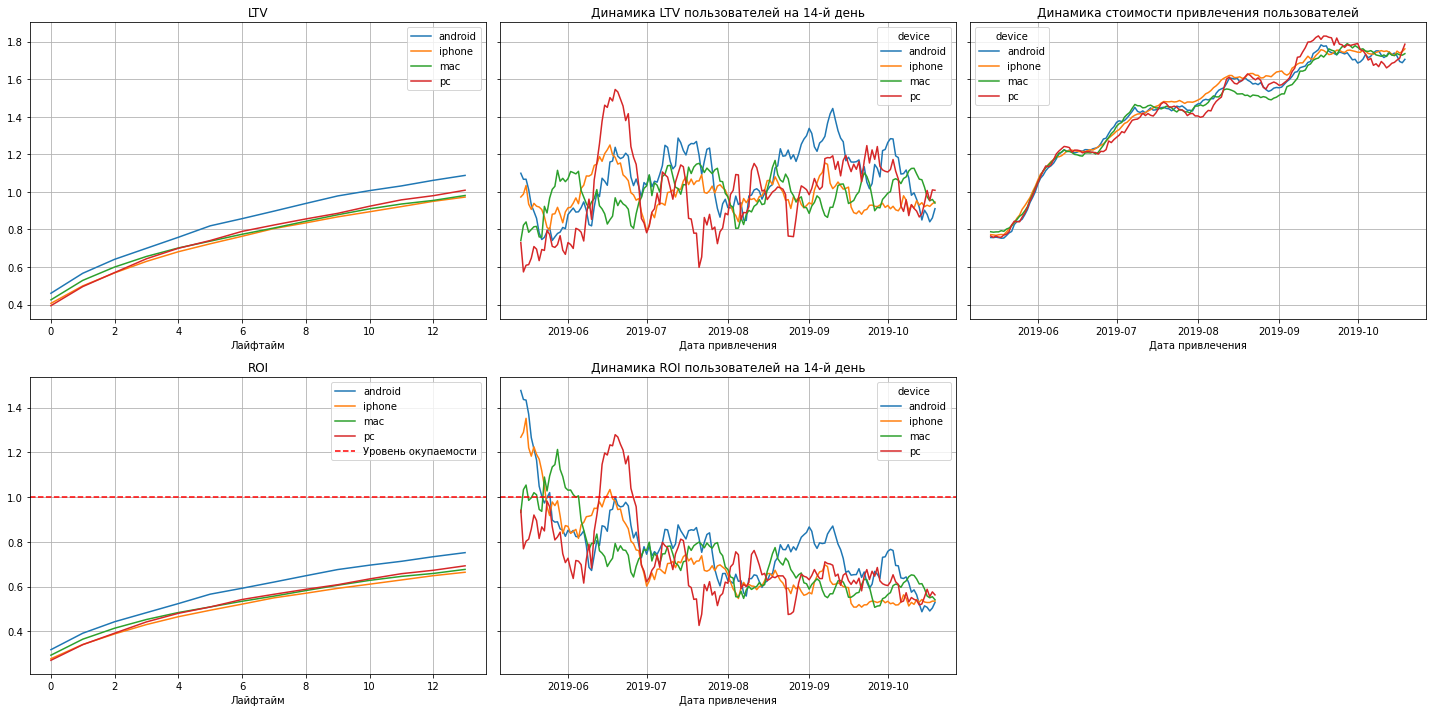

In [54]:
# смотрим окупаемость с разбивкой по устройствам для пользователей из США

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

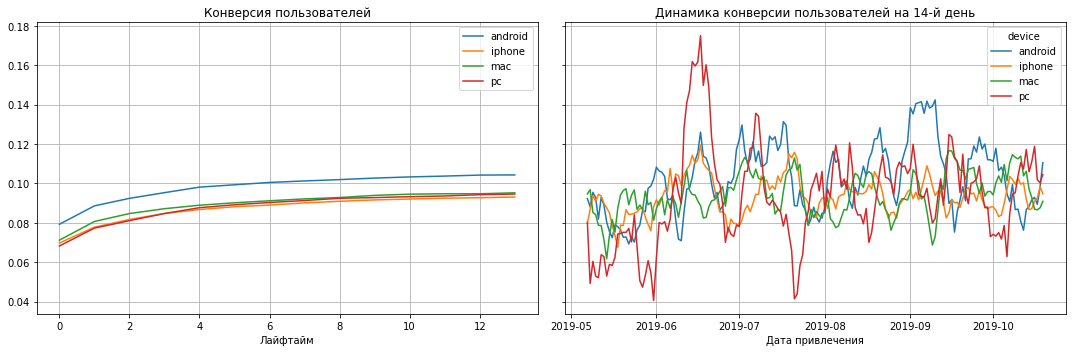

In [55]:
# смотрим конверсию с разбивкой по устройствам для пользователей из США
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

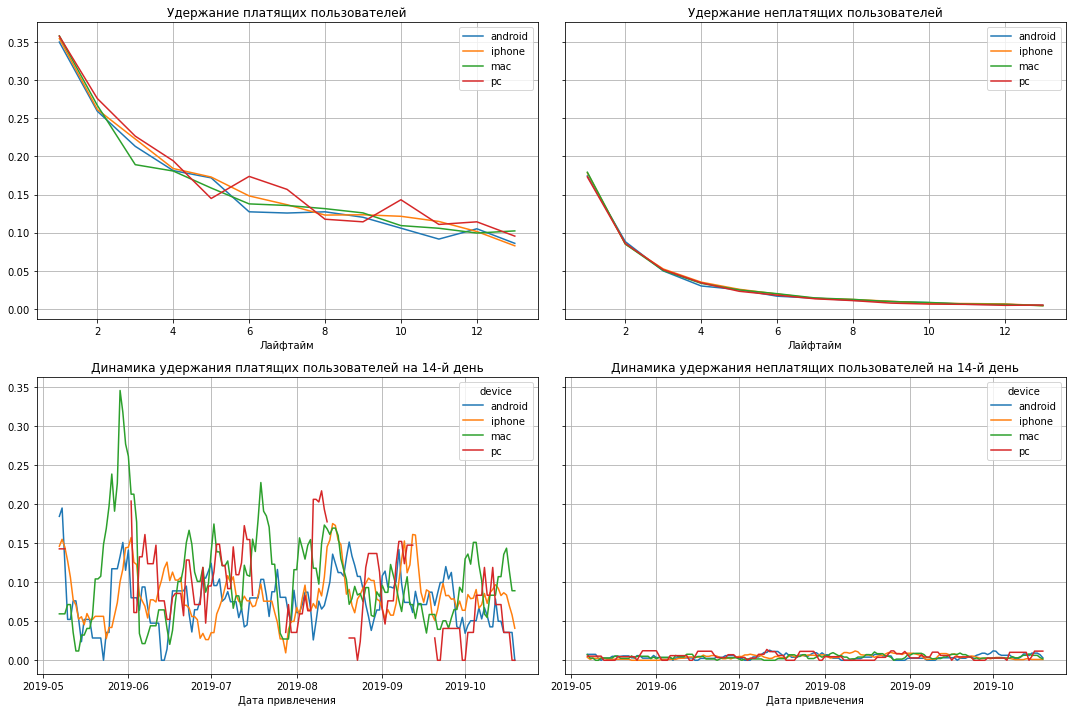

In [56]:
# смотрим удержание с разбивкой по устройствам для пользователей из США
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США в большинстве используют **iphone** - 27548, меньше всего используют *pc* .
Не окупаются все виды устройств.ROI  к концу исследования на уровне **70%**,  стоимость привлечения растет для всех видов устройств.
Самый высокий показатель конверсии у пользователей **android**.
Самый низкий показатель удержания у пользователей *iphone*.

**Выводы:**
Построили графики LTV, ROI и CAC, динамики LTV, CAC и ROI, конверсии и удержания пользователей без разбивки по параметрам и для различных регионов, устройств и каналов привлечения пользователей. 

На основе графиков сделали выводы:

В целом реклама не окупается. Негативное влияение на окупаемость оказывают пользователи из **США**, пользователи привлеченные через канал **tiptop**. 

Влияние на окупаемость рекламы оказывают не окупившиеся каналы: **tiptop, faceboom, adnonsense** (самая высокая окупаемость у канала yrabbit) ; ежемесячный  рост стоимости привлечения пользователей у канала **tiptop**. Не окупившиеся реклама у пользователей из **США**, на фоне самого большого количества пользователей и самого высокого LTV по сравнению с остальными странами. ROI пользователей из США показывает отрицательную динамику и опускается ниже уровня окупаемости, в тоже время стоимость привлечения значительно выше, чем в остальных странах и постоянно растет. Рост стоимости привлечения пользователей для всех устройств, не окупившиеся реклама для всех видов устройств, кроме PC. ROI пользователей PC на 14 день имеет отрицательную тенденцию и снижается ниже уровня окупаемости.

Самая высокая конверсия у пользователей **MAC**, канала **faceboom**, пользователей из **США**.
Самые низкие показатели конверсии пользователей *PC*, для остальных регионов и каналов уровень конверсии находится примерно на одном уровне.
Для всех устройств показатели удержания, платящих пользователей примерно одинаковые. Платящие пользователи **PC** удерживаются немного лучше остальных.
Выделяются низкие показатели удержания платящих пользователей у каналов *adnonsense и faceboom*.
Удержание платящих пользователей в *США* самое низкое среди остальных регионов.

Проблемы окупаемости могут быть связаны с ростом стоимости привлечения пользователей из США и с использованием каналов *tiptop и faceboom* для основного привлечения клиентов, данные каналы не окупаются и стоимость привлечения по ним намного выше стоимости привлечения по остальным каналам, а канал *faceboom* имеет самый низкий процент удержания пользователей. Хорошо окупаются каналы **rocketsuperads , mediatornado, yrabbit**, с меньшей стоимостью привлечения пользователей.
Канал **rocketsuperads** имеет хороший показатель конверсии пользователей и самый высокий показатель удержания платящих пользователей.
Большинство пользователей в США используют **iphone**, но у него самый низкий процент удержания пользователей.

## Итоги исследования

Данные представлены в 3 таблицах: `visits`, `orders`, `costs`. Были обнаружены и исправлены некорректные написания заголовков и значений в столбцах, столбцы, содержащие дату, приведены к типу date.  Аномалий и дубликатов данных не обнаружено.

Построены профили пользователей с использованием функции get_profiles()
+ Минимальная дата привлечения – **1 мая 2019 года**.
+ Максимальная дата привлечения с учетом горизонта анализа – **19 октября 2019 года**.
+ Момент анализа данных – **1 ноября 2019 года**.
+ Горизонт анализа – **14 дней**.

Пользователи приходят из 4 стран: **США, Великобритания, Франция и Германия**. 
Большинство пользователей приходят из **США**, в США также самая большая доля платящих пользователей относительно других регионов.
Большинство пользователей используют в качестве устройства **Iphone**, процент платящих пользователей больше в MAC.
Привлечение пользователей шло по 11 каналам: adnonsense, faceboom, lambdamediaads, leapbob, mediatornado, opplecreativemedia, organic, rocketsuperads, tiptop, wahoonetbanner, yrabbit. 

К рекламным источникам с наибольшей долей привлеченных пользователей относятся: 
- **faceboom 29144** привлеченных пользователя - **10,9%** платящих пользователей, 
- **adnonsense 3880** привлеченных пользователя - **10,2%** платящих пользователей,
- **lambdamediaads 2149** привлеченных пользователя - **9.5%** платящих пользователей,
- **tiptop 19561** привлеченный пользователь – **8.8%** платящих пользователей.

Общая сумма расхоов на маркетинг - **105497.3**

Сумма привлечения одного пользователя для всего проекта: **1,13**.
Больше всего было потрачено на следующие каналы привлечения пользователей:
- **tiptop - 54751.30**
- **faceboom - 32445.60**
- **wahoonetbanner - 5151.00**

Сильно рос CAC по каналу **tiptop**. По остальным каналам такого роста не наблюдалось. Стоимость привлечения одного пользователя по каналу **tiptop** составляет - **2,799**, **faceboom - 1.113**, **adnonsense - 1.008**.

Построили графики LTV, ROI и CAC, динамики LTV, CAC и ROI, конверсии и удержания пользователей без разбивки по параметрам и для различных регионов, устройств и каналов привлечения пользователей. Из построенных графиков сделали выводы, что в целом ***реклама не окупается***, ***ROI*** в конце периода исследования на уровне ***80%***, стоимость привлечения пользователей постоянно растет. LTV стабильно растет. Динамика ROI пользователей на 14 день существенно снижается.

**Не окупились затраты на рекламу**:
 1. *по каналам*:
    - tiptop, 
    - faceboom, 
    - adnonsense
 2. *по регионам*:
     - США
 3. *по устройствам*:
     - Iphone,
     - MAC
     - Android
 
Самая высокая окупаемость у канала **yrabbit**. 


***Конверсия пользователей:***

Самая высокая конверсия: у пользователей **MAC**, канала **faceboom**, пользователей из **США**.    
Самые низкие показатели конверсии пользователей *PC*.

***Удержание пользователей:***

Для всех устройств показатели удержания, платящих пользователей примерно одинаковые. Платящие пользователи **PC** удерживаются немного лучше остальных.
Выделяются низкие показатели удержания платящих пользователей у каналов *adnonsense и faceboom*.
Удержание платящих пользователей в *США* самое низкое среди остальных регионов.

Выявленные проблемы окупаемости рекламы: ежемесячный  рост стоимости привлечения пользователей у канала tiptop. Не окупившиеся реклама у пользователей из США, на фоне самого большого количества пользователей и самого высокого LTV по сравнению с остальными странами, а также низкого уровня удержания пользователей из США при высоком уровне конверсии данных пользователей. ROI пользователей из США показывает отрицательную динамику и опускается ниже уровня окупаемости, в тоже время стоимость привлечения значительно выше, чем в остальных странах и постоянно растет. Рост стоимости привлечения пользователей для всех устройств, не окупившиеся реклама для всех видов устройств, кроме PC. ROI пользователей PC на 14 день имеет отрицательную тенденцию и снижается ниже уровня окупаемости.

***Рекомендации***: пересмотреть и сократить расходы на рекламные компании в США по каналу *tiptop и faceboom*. Переориентировать рекламу в США на канал **rocketsuperads** имеющий хороший показатель конверсии пользователей и самый высокий показатель удержания платящих пользователей.  
Также стоит обратить внимание на пользователей из США, испоьзующих **iphone**, т.к. у него самый низкий процент удержания, возможно данная проблема связана с техническими неполадкам.